# IEEE European Low Voltage Test Feeder: 

http://sites.ieee.org/pes-testfeeders/resources/

The current IEEE test cases are focused on North American style systems; however it is common outside of North America to see low-voltage distribution systems, both radial and meshed. It is important to make sure that tools support both dominant styles of distribution system configuration. This test case seeks to fill a benchmark gap by presenting a number of common low-voltage configurations. This circuit also introduces quasi-static time series simulations.

IEEE European LV network is a generic 0.416 kV network serviced by one 0.8 MVA MV/LV transformer and a 11kV external grid. The network supplies 906 LV buses and 55 single phase loads.

# Snapshot of Time series data

In the benchmark document, there are three snapshots taken from a time series data.

- 12:01 AM : Off Peak(1 min) 
- 09:26 AM : On Peak (566 min)
- 12:00 AM : Off Peak (1440 min)

All the three networks have been saved into pandapower.networks 
We can select them using :

- 'off_peak_1',
- 'on_peak_566',
- 'off_peak_1440'  

In [1]:
import pandapower as pp
import pandapower.networks as nw

net = nw.ieee_european_lv_asymmetric('on_peak_566')

# Plotting the network

- 11 KV External Grid ( cyan triangle)
- 0.8 MVA 11/0.416 kV Transformer ( Intersecting Circles)
- Loads 
    - Phase A: red triangles, 
    - Phase B: yellow box
    - Phase C: blue circle

**PS:**

**Maximum unbalanced node 0.74% ( Black rectangle in the fig)**

**Max Line Loading 33.10 % ( Black line in the fig)**

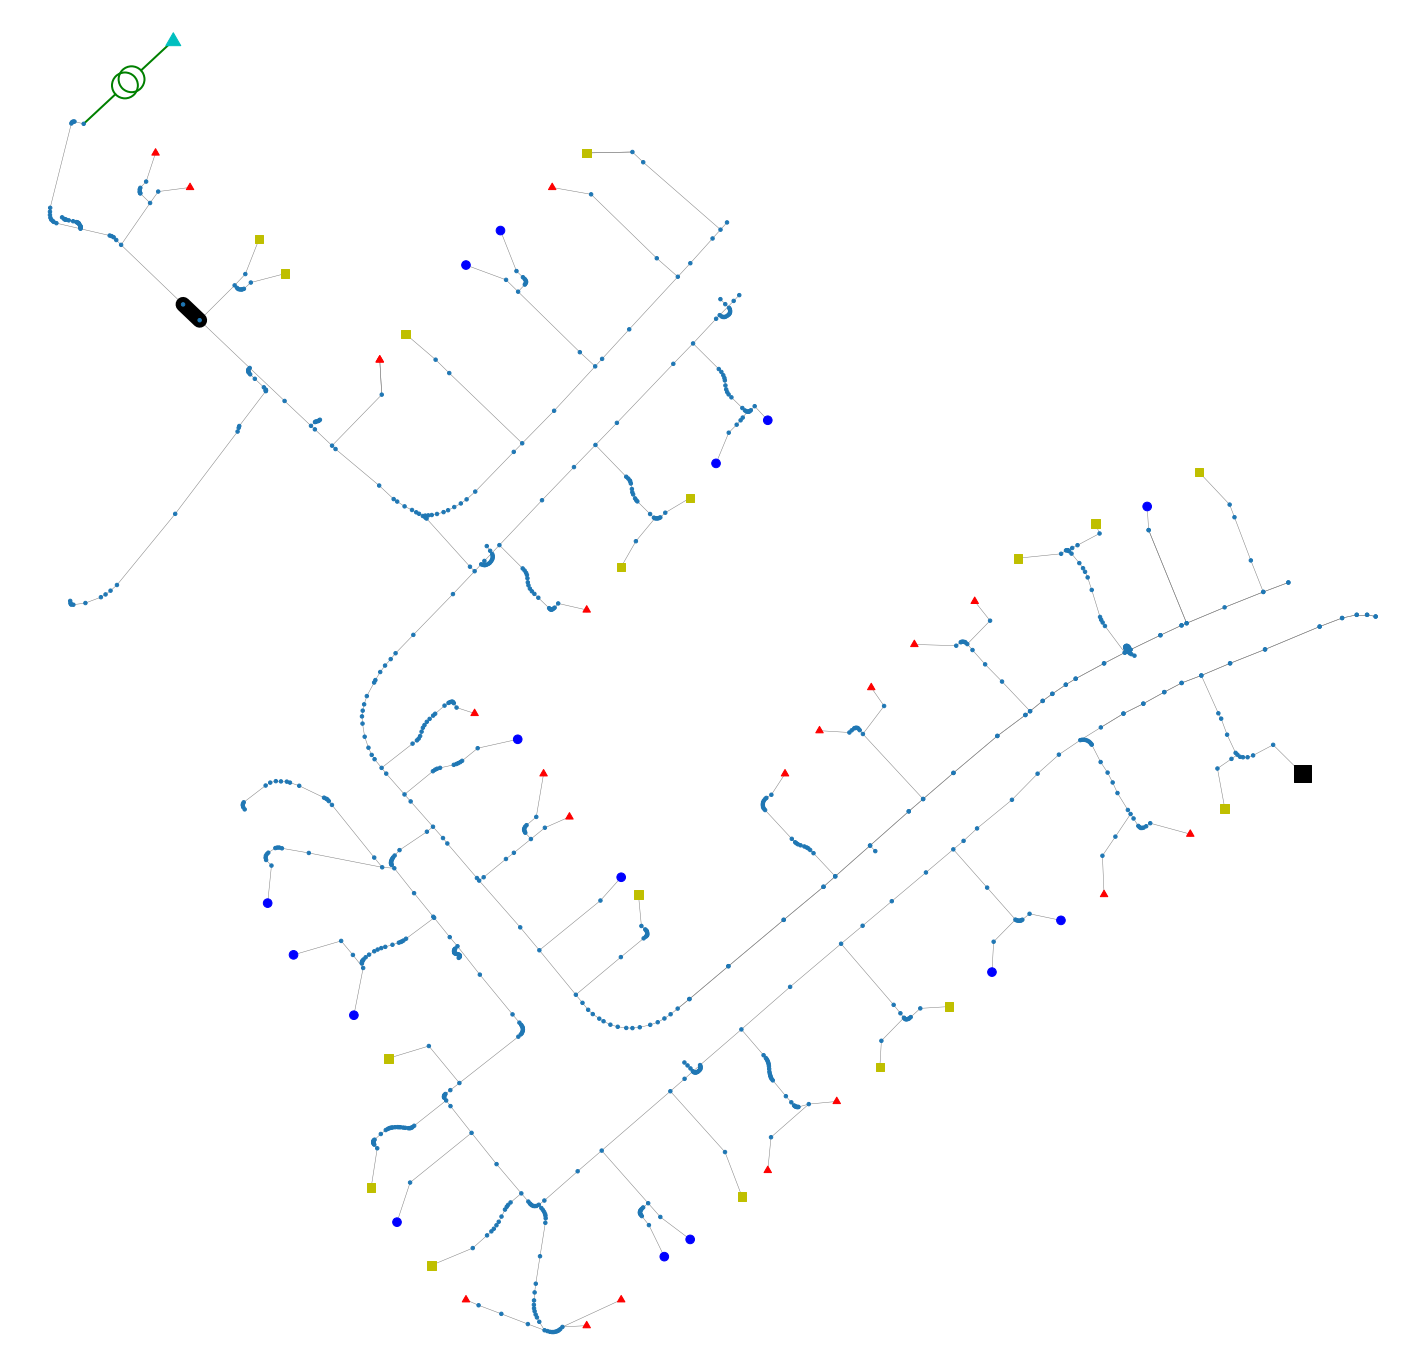

In [2]:
import pandapower.plotting as plot
import numpy as np
try:
    import seaborn
    colors = seaborn.color_palette()
except:
    colors = ["b", "g", "r", "c", "y"]
%matplotlib inline

# Plot all the buses
bc = plot.create_bus_collection(net, net.bus.index, size=.2, color=colors[0], zorder=10)

#Plot Transformers
tlc, tpc = plot.create_trafo_collection(net, net.trafo.index, color="g",size =1.5 )

# Plot all the lines
lcd = plot.create_line_collection(net, net.line.index, color="grey", linewidths=0.5, use_bus_geodata=True)

# Plot the external grid
sc = plot.create_bus_collection(net, net.ext_grid.bus.values, patch_type="poly3", size=1, color="c", zorder=11)

#Plot all the loads
ldA = plot.create_bus_collection(net, net.asymmetric_load.bus.values[np.where(net.asymmetric_load.p_a_mw >0)], patch_type="poly3", size=.5, color="r", zorder=11)
ldB = plot.create_bus_collection(net, net.asymmetric_load.bus.values[np.where(net.asymmetric_load.p_b_mw >0)], patch_type="rect", size=.5, color="y", zorder=11)
ldC = plot.create_bus_collection(net, net.asymmetric_load.bus.values[np.where(net.asymmetric_load.p_c_mw >0)], patch_type="circle", size=.5, color="b", zorder=11)

# Plot the max. loaded line and max. unbalanced node
max_load = plot.create_line_collection(net, np.array([net.res_line_3ph.loading_percent.idxmax()]), color="black", linewidths=15, use_bus_geodata=True)
max_unbal = plot.create_bus_collection(net, np.array([net.res_bus_3ph.unbalance_percent.idxmax()]), patch_type="rect", size=1, color="black", zorder=11)

# Draw all the collected plots
plot.draw_collections([lcd, bc, tlc, tpc, sc,ldA,ldB,ldC,max_load,max_unbal], figsize=(20,20))

# Sample Result Values

Max loaded line and most unbalanced load has been marked in black in the plot.

The exact values are provided below:
- Maximum unbalance %
- Max Line Loading %

In [3]:
net.res_bus_3ph.unbalance_percent.max()

0.74784047652783

In [4]:
net.res_line_3ph.loading_percent.max()

33.207141699375065